In [336]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [337]:
df_train_data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test_data=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
df_train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Data preparation**

In [338]:
#shuffle both datasets with same seed
df_train_data = df_train_data.sample(frac=1, random_state=42)
df_test_data = df_test_data.sample(frac=1, random_state=42)
df_train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [339]:
#Observe that the pixels are 0-255
df_train_data.iloc[0].unique()

array([  8,   0,   3,  62, 185, 255, 229,  28, 173, 253,  81,   2, 126,
       251, 178,  55,  51, 156,  68, 154,  13, 217,   9, 188,   6,  22,
        11, 167, 160, 235, 157, 233,  16,  59, 244,  78, 105,  21, 184,
       247,  74,  49, 114, 116,  87, 168, 250, 200, 242, 246, 136,  10,
       222,  33, 197,  99,  46, 174, 179,  44, 237, 128, 205, 161, 155,
       220,  19, 162,   4, 189, 224,  73,  60, 165, 236, 252, 211, 124,
        36, 142, 207, 214,  25])

In [340]:
"""
We should normalize it to 0-1. Observe the structure of the pandas dataset. The best is to grab columns 1:end and normalize them.
The first column are the labels of the images
"""
df_train_data=pd.concat([df_train_data.iloc[:,0], df_train_data.iloc[:,1:]/255], axis=1)
df_train_data
#Now we have our dataframe normalized with its labels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38509,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25536,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31803,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39863,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11284,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [341]:
#Same for test set
df_test_data=pd.concat([df_test_data.iloc[:,0], df_test_data.iloc[:,1:]/255], axis=1)
df_test_data.iloc[0].unique()
#We can observe that the values are normalized.

array([0.        , 0.45490196, 0.95686275, 0.56078431, 0.04313725,
       0.88627451, 0.99607843, 0.53333333, 0.02745098, 0.86666667,
       0.96862745, 0.06666667, 0.34509804, 0.58039216, 0.64313725,
       0.52156863, 0.27843137, 0.9372549 , 0.74901961, 0.03529412,
       0.02352941, 0.17254902, 0.05882353, 0.80784314, 0.28627451,
       0.11764706, 0.34117647, 0.84313725, 0.9254902 , 0.09803922,
       0.16078431, 0.87843137, 0.0627451 , 0.68627451, 0.03921569,
       0.88235294, 0.96078431, 0.25882353, 0.27058824, 0.91372549,
       0.10980392, 0.43921569, 0.21960784, 0.40392157, 0.65490196,
       0.6745098 , 0.41568627, 0.94509804, 0.61176471, 0.29411765,
       0.16470588, 0.11372549, 0.25490196, 0.7254902 , 0.90588235,
       0.83529412, 0.25098039, 0.89803922, 0.69411765, 0.01176471,
       0.0745098 , 0.81568627, 0.89019608, 0.47843137, 0.14509804,
       0.01960784, 0.19607843, 0.2745098 , 0.75294118, 0.37647059,
       0.97647059, 0.16862745, 0.65882353, 0.29019608, 0.99215

In [342]:
#Convert pandas to numpy (because our NN is from scratch with numpy)
train_data=np.array(df_train_data)
test_data=np.array(df_test_data)
m_samples, n_features =train_data.shape

In [343]:
#Separate the dataset in training(training + validation) and testing
validation_set=train_data[0:1000].T
y_validation=validation_set[0]
y_validation=np.round(y_validation).astype(int) #We need them as integer for the correct_label_Y function
x_validation=validation_set[1:n_features]

train_set=train_data[1000:m_samples].T # shape(785,41000)
y_train=train_set[0]
y_train=np.round(y_train).astype(int)

x_train=train_set[1:n_features]

#Check the dimensions
print(x_train.shape, y_train.shape)
print(x_validation.shape, y_validation.shape)
print(X_train.shape, Y_train.shape)

(784, 41000) (41000,)
(784, 1000) (1000,)
(784, 41000) (41000,)


Our Neural Network is going to be of 1 hidden layer and 1 output layer with 10 neurons to recognize the digit shown.

In [344]:
def init_params():
    
    """
    Set initial parameters of the NN. 784 input pixels because the image is 28x28=784
    """
    
    W1=np.random.rand(10,784)-0.5 
    b1=np.random.rand(10,1)-0.5 
    W2=np.random.rand(10,10)-0.5 
    b2=np.random.rand(10,1)-0.5 
    
    return W1,b1,W2,b2

def ReLU(Z):
    
    """
    Activation function for each neuron.
    """
    
    return np.maximum(Z,0)
    
def softmax(Z):
    
    """
    Activation function for the neurons in the last layer.
    We use softmax to return a probability function (0,1)
    """
    return np.exp(Z) / sum(np.exp(Z))
    
    
def forward_prop(W1,b1,W2,b2, X):
    
    """
    Forward propagation of the NN.
    """
    
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    
    return Z1,A1,Z2,A2
       
def correct_label(Y):

    """
    Here we use one-hot encoding.
    One-hot encoding is used in machine learning for tasks such as multi-class classification,
    where the target labels need to be represented in a numerical format. In our case, we have
    10 neurons that each one represents a (label) number of the MNIST dataset (e.g., 4 is (0,0,0,0,1,0,0,0,0,0,0))
    """
    
    correct_label_Y=np.zeros((Y.size, Y.max()+1)) #creates a NumPy array filled with zeros.
    correct_label_Y[np.arange(Y.size),Y]=1 #assigns the value 1 to specific elements in the array
    correct_label_Y=correct_label_Y.T #transpose it
    return correct_label_Y


def deriv_ReLU(Z):
    
    """
    Derivative of ReLU needed for backpropagation.
    """
    
    return Z>0

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    
    """
    Backpropagation calculations.
    """
    
    correct_label_Y=correct_label(Y)
    dZ2=A2-correct_label_Y
    dW2=1/m*dZ2.dot(A1.T)
    db2=1/m*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1=1/m*dZ1.dot(X.T)
    db1=1/m*np.sum(dZ1)
    
    return dW1,db1, dW2,db2
    
    
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2, alpha):
    
    """
    Update parameters.
    """
    
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    
    return W1,b1,W2,b2

In [345]:
def get_predictions(A2):
    
    """
    Get the neuron with the highest probability.
    """
    
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    
    """
    Compute accuracy.
    """
    
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y, iterations, alpha):
    
    
    """
    Optimization: Gradient descent.
    """
    
    W1,b1,W2,b2=init_params()                                                 #Initialize parameters
    loss=[]
    iteration=[]
    for i in range(iterations):                                               #Number of iterations
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)                               #Forward propagation
        dW1,db1, dW2,db2=back_prop(Z1,A1,Z2,A2,W1, W2,X,Y)                    #Backpropagation
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1, dW2, db2, alpha)       #Update parameters
        if i%10==0:
            print("Iteration: ", i)
            predictions=get_predictions(A2)
            accuracy=get_accuracy(predictions, Y)
            iteration.append(i)
            loss.append(1-accuracy)
            print("Accuracy: ", accuracy)
            
    print("Iteration: ", i)
    print("Accuracy: ", accuracy)
    return W1, b1, W2, b2, loss, iteration

In [346]:
W1,b1,W2,b2,loss,iteration=gradient_descent(x_train, y_train, 500, 0.05)

Iteration:  0
Accuracy:  0.1484390243902439
Iteration:  10
Accuracy:  0.17229268292682925
Iteration:  20
Accuracy:  0.2045121951219512
Iteration:  30
Accuracy:  0.23921951219512194
Iteration:  40
Accuracy:  0.2812682926829268
Iteration:  50
Accuracy:  0.3349268292682927
Iteration:  60
Accuracy:  0.3878536585365854
Iteration:  70
Accuracy:  0.4217073170731707
Iteration:  80
Accuracy:  0.44821951219512196
Iteration:  90
Accuracy:  0.47492682926829266
Iteration:  100
Accuracy:  0.4999268292682927
Iteration:  110
Accuracy:  0.5258536585365854
Iteration:  120
Accuracy:  0.5509512195121952
Iteration:  130
Accuracy:  0.5717317073170731
Iteration:  140
Accuracy:  0.5894146341463414
Iteration:  150
Accuracy:  0.605609756097561
Iteration:  160
Accuracy:  0.6200243902439024
Iteration:  170
Accuracy:  0.6339756097560976
Iteration:  180
Accuracy:  0.6449756097560976
Iteration:  190
Accuracy:  0.6561707317073171
Iteration:  200
Accuracy:  0.6673170731707317
Iteration:  210
Accuracy:  0.6762926829268

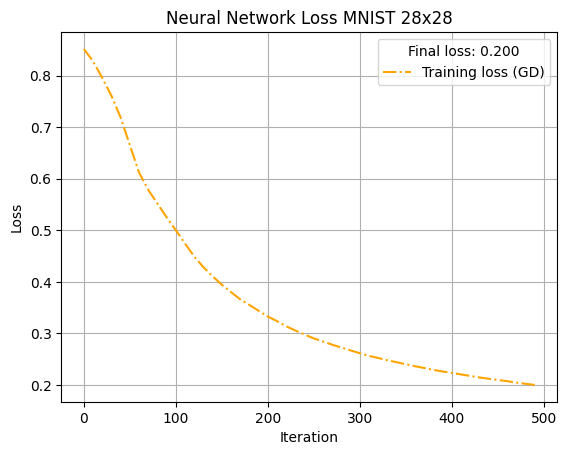

In [347]:
#Let´s plot the loss
import matplotlib.pyplot as plt

plt.plot(iteration, loss, c="orange", linestyle="dashdot", label="Training loss (GD)")

plt.title("Neural Network Loss MNIST 28x28")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(title=f"Final loss: {loss[-1]:.3f}")
plt.grid()
plt.show()     

Once the model is trained, we have the model parameters. The model now uses as input the image pixels and with the parameters already optimized it shows which is the most probable label.
We will create a function to compute that process

In [348]:
def make_predictions(X,W1,b1,W2,b2):
    
    """
    This function takes the input data X and the parameters of the
    NN (W1, b1, W2, b2) and performs forward propagation to make
    predictions for the given input image.
    """
    
    _,_,_, A2 = forward_prop(W1,b1,W2,b2,X)
    predictions=get_predictions(A2)
    prob=A2
    return predictions, prob

def test_prediction(index, W1, b1, W2, b2):
    
    """
    Tests the prediction of the NN on a single image from the dataset.
    Grabs the image with index "index" in the dataset and uses the model´s parameters
    already optimized by gradient descent.
    """
    
    current_image=X_train[:, index, None]
    prediction, prob =make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label=Y_train[index]
    print("Prediction: ", prediction)
    print("Probability: ", np.max(prob))
    print("Label: ", label)
    
    current_image=current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()
    
    print("Probability of the complete one-hot encoding: ", prob.T)

Prediction:  [1]
Probability:  0.9323902546695491
Label:  1


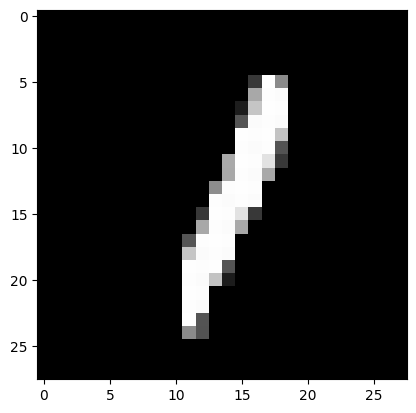

Probability of the complete one-hot encoding:  [[8.93031089e-06 9.32390255e-01 1.92694763e-02 9.55145874e-03
  8.52001764e-04 8.89771508e-04 5.82396307e-04 2.73353740e-02
  7.96023096e-03 1.16010545e-03]]


In [349]:
test_prediction(5, W1,b1,W2,b2)

In [350]:
validation_predictions, probs =make_predictions(x_validation, W1,b1,W2,b2)
get_accuracy(validation_predictions, y_validation)

0.817

We observe that the accuracy is pretty good. Other ways to improve accuracy would be to use other type of optimization (e.g., stochastic gradient descent) or adding more hidden layers.